In [2]:
using HDF5, PyPlot, Statistics
push!(LOAD_PATH, "../Preprocesamiento/")
using PreprocTools, ArraySetTools

In [7]:
arxname="/home/karel/BRWFiles/Facilitada/Completo_19115s1cut_single_event_preproc.h5"
arx=h5open(arxname)
names(arx)

7-element Array{String,1}:
 "CSDALindenberg"
 "CanalesBuenos" 
 "CanalesMalos"  
 "LFPSaturados"  
 "desde"         
 "freq"          
 "hasta"         

In [10]:
read(arx["freq"])

7.022058198545425

In [12]:
freq=read(arx["freq"])
lfp=read(arx["LFPSaturados"])
buenos=read(arx["CanalesBuenos"])
malos=read(arx["CanalesMalos"])
nmax=size(lfp)[3]

2000

In [13]:
ejemplo=lfp[33,34,:];
trango=(1:nmax)./freq;

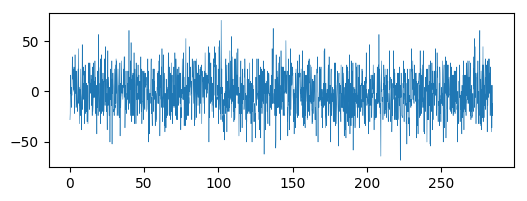

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7feb5c0a4b70>

In [14]:
figure(figsize=(6,2))
plot(trango, ejemplo, lw=0.4)

In [15]:
lfpstdd=zeros(64,64)
for j=1:64, k=1:64
    lfpstdd[j,k]=std(lfp[j,k,:])
end

In [16]:
lfpstdwin=zeros(64,64)
for j=1:64, k=1:64
    lfpstdwin[j,k]=sum(desviacionventanas(lfp[j,k,:], 49, 7.022))
end

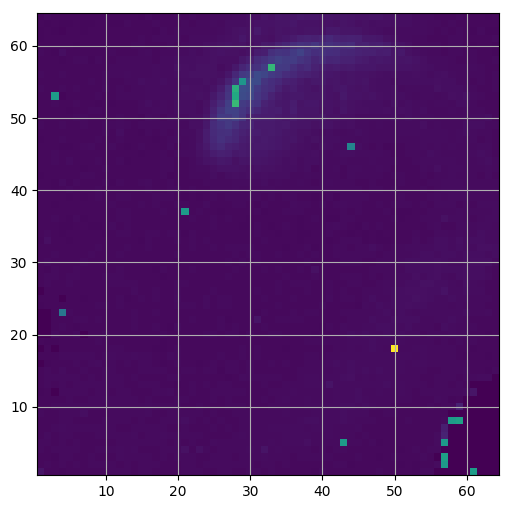

In [17]:
figure(figsize=(6,6))
imshow(lfpstdwin, origin="lower", extent=[0.5,64.5, 0.5,64.5])
grid()

In [18]:
ruidosos=BuscaRuidosos(lfp, 0.1,199, 7.022)
picos=buscaCanalPicos(lfp, 0.1, 199, 7.022)

ruidgraf=elemtorow(ruidosos)
picgraf=elemtorow(picos);

Estoy buscando del cuadro 1 al , 1398


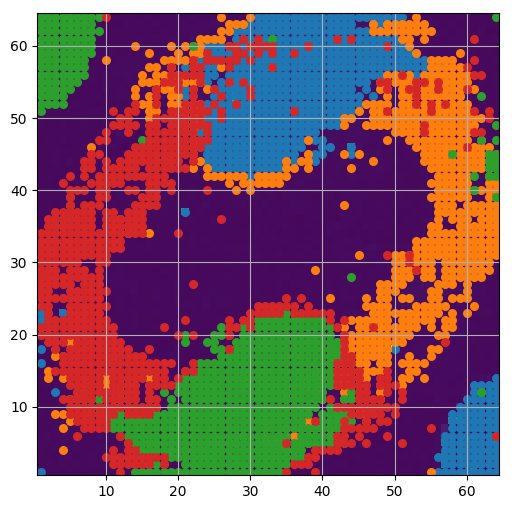

PyObject <matplotlib.collections.PathCollection object at 0x7feb4f04d518>

In [48]:
figure(figsize=(6,6))
imshow(lfpstdwin, origin="lower", extent=[0.5,64.5, 0.5,64.5])

grid(which="both")

tam=30
scatter(ruidgraf[:,2], ruidgraf[:,1], s=tam)
scatter(picgraf[:,2], picgraf[:,1], s=tam)



cotouno=ruidgraf .* (-1) .+ 65
cotodos=picgraf .* (-1) .+ 65

scatter(cotouno[:,2], cotouno[:,1], s=tam)
scatter(cotodos[:,2], cotodos[:,1], s=tam)


In [36]:
ejemplos=[50 27; 56 31; 59 39; 58 46; 56 56; 47 57; 40 58; 25 52]
labels=["a", "b", "c", "d", "e", "f", "g", "h"]

8-element Array{String,1}:
 "a"
 "b"
 "c"
 "d"
 "e"
 "f"
 "g"
 "h"

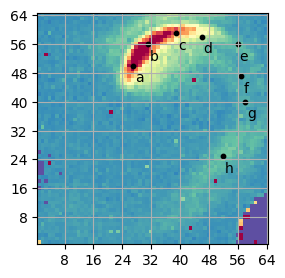

In [38]:
figure(figsize=(3,3))
imshow(lfpstdd, origin="lower", extent=[0.5,64.5, 0.5,64.5], cmap="Spectral_r", vmin=1, vmax=150)
#colorbar()
xticks(collect(8:8:64))
yticks(collect(8:8:64))
grid()
scatter(ejemplos[:,2], ejemplos[:,1], color="black", s=10)
for j=1:8
    annotate(labels[j], xy=(ejemplos[j,2]+0.5, ejemplos[j,1]-4.5), color="black")
end

savefig("MapaElectrodosSelectosFacilitada.svg", dpi=90)

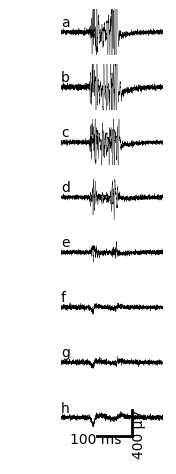

In [39]:

tiempo=1:nmax
t=700

farofa, lista=subplots(8, sharex=true, sharey=true, figsize=(1.4,8*0.7))

for j=1:8
    xlim(trango[1]-10, trango[end]+10)
    ylim(-400,400)
    (reng, colu)=(ejemplos[j,1],ejemplos[j,2])
    lista[j].axis("off")
    lista[j].plot(trango,vec(lfp[reng,colu,:]),
    linewidth=0.25, color="black")
    lista[j].annotate(labels[j],xy=(0,100), annotation_clip=false, fontsize=10)
end

lista[8].plot([100,200],[-330,-330], lw=2, c="k")
lista[8].annotate("100 ms", xy=(26,-450), fontsize=10, annotation_clip=false)

lista[8].plot([200,200],[-330,130], lw=2, c="k")
lista[8].annotate("400 µV", xy=(200,-50), fontsize=10,annotation_clip=false, rotation=90)

savefig("TrazosSelectosFacilitada.svg",dpi=90)